# Micro Credit Defaulter Project

In [6]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt


In [7]:
df=pd.read_csv('Data file.csv')

In [8]:
df

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


In [9]:
df.head

<bound method NDFrame.head of         Unnamed: 0  label       msisdn     aon  daily_decr30  daily_decr90  \
0                1      0  21408I70789   272.0   3055.050000   3065.150000   
1                2      1  76462I70374   712.0  12122.000000  12124.750000   
2                3      1  17943I70372   535.0   1398.000000   1398.000000   
3                4      1  55773I70781   241.0     21.228000     21.228000   
4                5      1  03813I82730   947.0    150.619333    150.619333   
...            ...    ...          ...     ...           ...           ...   
209588      209589      1  22758I85348   404.0    151.872333    151.872333   
209589      209590      1  95583I84455  1075.0     36.936000     36.936000   
209590      209591      1  28556I85350  1013.0  11843.111667  11904.350000   
209591      209592      1  59712I82733  1732.0  12488.228333  12574.370000   
209592      209593      1  65061I85339  1581.0   4489.362000   4534.820000   

        rental30  rental90  last_

In [10]:
df.shape

(209593, 37)

There are 209593 rows and 37 columns

In [11]:
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

# Dataframe description:

A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. MFS becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on. 
Many microfinance institutions (MFI), experts and donors are supporting the idea of using mobile financial services (MFS) which they feel are more convenient and efficient, and cost saving, than the traditional high-touch model used since long for the purpose of delivering microfinance services. Though, the MFI industry is primarily focusing on low income families and are very useful in such areas, the implementation of MFS has been uneven with both significant challenges and successes.
Today, microfinance is widely accepted as a poverty-reduction tool, representing $70 billion in outstanding loans and a global outreach of 200 million clients.
We are working with one such client that is in Telecom Industry. They are a fixed wireless telecommunications network provider. They have launched various products and have developed its business and organization based on the budget operator model, offering better products at Lower Prices to all value conscious customers through a strategy of disruptive innovation that focuses on the subscriber. 
They understand the importance of communication and how it affects a person’s life, thus, focusing on providing their services and products to low income families and poor customers that can help them in the need of hour. 
They are collaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be 6 (in Indonesian Rupiah), while, for the loan amount of 10 (in Indonesian Rupiah), the payback amount should be 12 (in Indonesian Rupiah). 
The sample data is provided to us from our client database. It is hereby given to you for this exercise. In order to improve the selection of customers for the credit, the client wants some predictions that could help them in further investment and improvement in selection of customers. 


It is a classification type of problem with 'label'being our target variable.

# Checking null values

In [12]:
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

There are no null values in our data set.

# Heatmap for the representation of null values

<AxesSubplot:>

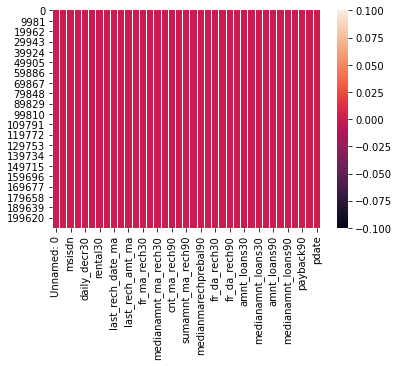

In [13]:
sns.heatmap(df.isnull())

The heatmap also shows the absence of null values.

# Checking the data types of the columns

In [14]:
df.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

In [15]:
df['label'].unique()

array([0, 1])

There are two unique classes in our target variable.

In [16]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [17]:
df.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

We can see that there are three object type attributes namely 'msisdn','pcircle'and 'pdate'.

In [19]:
df.shape

(209593, 36)

There are 209593 rows and 36 columns.

# Data Preparation

# Removing coumns where number of unique value is 1

Lets lookat the no of unique values for each column and lets remove the unique value 1 because it will not help us in our further analysis. 

In [20]:
unique=df.nunique()
unique=unique[unique.values == 1]

In [21]:
df.drop(labels = list(unique.index),axis=1, inplace=True)

In [22]:
df

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,2016-07-20
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,2016-08-10
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,2016-08-19
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,2016-06-06
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,...,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,2016-06-17
209589,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,...,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,2016-06-12
209590,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,...,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,2016-07-29
209591,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,...,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,2016-07-25


In [23]:
df.shape

(209593, 35)

There are 209593 rows and 35 columns.

In [24]:
df.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,2016-07-20
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,2016-08-10
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,2016-08-19
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,2016-06-06
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,2016-06-22


In [25]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
label,209593.0,0.875177,0.330519,0.000000,1.000,1.000000,1.00,1.000000
aon,209593.0,8112.343445,75696.082531,-48.000000,246.000,527.000000,982.00,999860.755168
daily_decr30,209593.0,5381.402289,9220.623400,-93.012667,42.440,1469.175667,7244.00,265926.000000
daily_decr90,209593.0,6082.515068,10918.812767,-93.012667,42.692,1500.000000,7802.79,320630.000000
rental30,209593.0,2692.581910,4308.586781,-23737.140000,280.420,1083.570000,3356.94,198926.110000
rental90,209593.0,3483.406534,5770.461279,-24720.580000,300.260,1334.000000,4201.79,200148.110000
last_rech_date_ma,209593.0,3755.847800,53905.892230,-29.000000,1.000,3.000000,7.00,998650.377733
last_rech_date_da,209593.0,3712.202921,53374.833430,-29.000000,0.000,0.000000,0.00,999171.809410
last_rech_amt_ma,209593.0,2064.452797,2370.786034,0.000000,770.000,1539.000000,2309.00,55000.000000
cnt_ma_rech30,209593.0,3.978057,4.256090,0.000000,1.000,3.000000,5.00,203.000000


We can observe from summary statistics that mean is greater than median in all the columns so our data is right skewed.The difference between the 75th percentile and the maximum is also high which indicates the presence of outliers .The outliers have to be removed.

Checking the summary of object and datetime columns

In [26]:
df.describe(include=['object','datetime']).transpose()

,count,unique,top,freq
msisdn,209593,186243,47819I90840,7
pdate,209593,82,2016-07-04,3150


msidn is the mobie number of the user which is unique for every customer.There are only 186243 unique numbers out of 209593 numbers and the rest of the data is duplicate entry which has to be removed.

pdate column gives us information of the data as to when it was collected and here only three month data is mentioned.

In [27]:
df1=df.copy()

# Removing duplicate entries from'msisdn'column

In [28]:
df=df.drop_duplicates(subset = 'msisdn',keep='first')


In [29]:
df.shape

(186243, 35)

There are 186243 rows and 35 columns.

# Printing the object datatypes and their unique values

In [30]:
for column in df.columns:
    if df[column].dtypes == object:
        print(str(column) + ' : ' + str(df[column].unique()))
        print('**********************************************************************************************************')
        print('\n')

msisdn : ['21408I70789' '76462I70374' '17943I70372' ... '22758I85348' '59712I82733'
 '65061I85339']
**********************************************************************************************************


pdate : ['2016-07-20' '2016-08-10' '2016-08-19' '2016-06-06' '2016-06-22'
 '2016-07-02' '2016-07-05' '2016-08-05' '2016-06-15' '2016-06-08'
 '2016-06-12' '2016-06-20' '2016-06-29' '2016-06-16' '2016-08-03'
 '2016-06-24' '2016-07-04' '2016-07-03' '2016-07-01' '2016-08-08'
 '2016-06-26' '2016-06-23' '2016-07-06' '2016-07-09' '2016-06-10'
 '2016-06-07' '2016-06-27' '2016-08-11' '2016-06-30' '2016-06-19'
 '2016-07-26' '2016-08-14' '2016-06-14' '2016-06-21' '2016-06-25'
 '2016-06-28' '2016-06-11' '2016-07-27' '2016-07-23' '2016-08-16'
 '2016-08-15' '2016-06-02' '2016-06-05' '2016-08-02' '2016-07-28'
 '2016-07-18' '2016-08-18' '2016-07-16' '2016-07-29' '2016-07-21'
 '2016-06-03' '2016-06-13' '2016-08-01' '2016-07-13' '2016-07-10'
 '2016-06-09' '2016-07-15' '2016-07-11' '2016-08-09' '201

Contains only one circle area dataso it has no impact on our model even if we drop this feature.

# Printing the float datatype and the number of unique values

In [31]:
for column in df.columns:
    if df[column].dtype==np.number:
        print(str(column) + ' : ' + str(df[column].nunique()))
        print(df[column].nunique())
        print('//////*******************************************************************************///////')

<ipython-input-31-e528d29e6cf3>:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype==np.number:


aon : 4282
4282
//////*******************************************************************************///////
daily_decr30 : 130323
130323
//////*******************************************************************************///////
daily_decr90 : 139842
139842
//////*******************************************************************************///////
rental30 : 117881
117881
//////*******************************************************************************///////
rental90 : 125595
125595
//////*******************************************************************************///////
last_rech_date_ma : 1061
1061
//////*******************************************************************************///////
last_rech_date_da : 1061
1061
//////*******************************************************************************///////
fr_ma_rech30 : 961
961
//////*******************************************************************************///////
sumamnt_ma_rech30 : 13130
13130
//////***********

# Checking the number of number of defaulter and non defaulter customers.


In [32]:
df['label'].value_counts()

1    160383
0     25860
Name: label, dtype: int64

Checking the same percentage wise

1' indicates that the loan has been payed i.e. Non- defaulter =160383 '0' indicates that the loan has not been payed i.e. defaulter=25860

In [33]:
df['label'].value_counts(normalize=True) *100


1    86.114914
0    13.885086
Name: label, dtype: float64

We can see that 86%of data is label 1 and 13.8% of data is label 0

So from above we can say that there is class imbalance which exists.It has to be balanced so that we can build our model.

# Correlation

In [35]:
cor=df.corr()

In [36]:
cor

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
label,1.000000,-0.004035,0.174901,0.173016,0.057207,0.075869,0.004113,0.001814,0.139969,0.244728,...,0.197565,0.199916,-0.000274,0.050067,0.004305,0.205065,0.086033,0.041265,0.050892,0.053776
aon,-0.004035,1.000000,0.000630,0.000052,-0.002930,-0.002618,0.001853,-0.001796,0.004102,-0.004315,...,-0.003157,-0.003302,-0.003096,0.004679,0.000192,-0.003336,-0.000975,0.002346,0.002246,0.002549
daily_decr30,0.174901,0.000630,1.000000,0.977659,0.427503,0.444932,-0.000171,-0.001311,0.287181,0.444365,...,0.346504,0.454169,0.001569,-0.005629,0.008865,0.542179,0.396803,-0.031485,0.033669,0.056822
daily_decr90,0.173016,0.000052,0.977659,1.000000,0.420561,0.457443,0.000058,-0.001484,0.275195,0.419650,...,0.321006,0.430940,0.001283,0.000012,0.009220,0.544854,0.394487,-0.029046,0.025432,0.050147
rental30,0.057207,-0.002930,0.427503,0.420561,1.000000,0.955233,-0.000949,0.003294,0.128773,0.220472,...,0.162833,0.217586,-0.001525,-0.013746,0.003026,0.280233,0.225449,-0.032555,0.075530,0.099533
rental90,0.075869,-0.002618,0.444932,0.457443,0.955233,1.000000,-0.001758,0.002643,0.123436,0.218618,...,0.154900,0.216641,-0.002189,-0.006703,0.004301,0.307920,0.241772,-0.031045,0.069847,0.104731
last_rech_date_ma,0.004113,0.001853,-0.000171,0.000058,-0.000949,-0.001758,1.000000,0.002629,-0.000754,0.006491,...,0.002308,0.001031,0.001681,0.002430,-0.000216,0.000664,-0.003097,0.003261,-0.002857,-0.001787
last_rech_date_da,0.001814,-0.001796,-0.001311,-0.001484,0.003294,0.002643,0.002629,1.000000,-0.000699,0.002690,...,0.001722,0.001443,0.001135,0.000009,-0.002355,0.001179,0.002294,-0.002258,-0.000020,0.000699
last_rech_amt_ma,0.139969,0.004102,0.287181,0.275195,0.128773,0.123436,-0.000754,-0.000699,1.000000,0.008012,...,-0.019892,0.017706,0.000558,0.029945,0.000444,0.024067,0.148656,0.022939,-0.026037,-0.013236
cnt_ma_rech30,0.244728,-0.004315,0.444365,0.419650,0.220472,0.218618,0.006491,0.002690,0.008012,1.000000,...,0.733577,0.723759,-0.001186,-0.058580,0.012307,0.658939,0.180305,-0.063378,0.057166,0.031696


From the above corelation table the following observations can be drawn:

'daily_decr30' and 'daily_decr90' are highly correlated with each other.

'rental30' and 'rental90' also are highly correlated with each other.

'cnt_loans30' and 'amount_loans30' columns are highly correlated with each other.

'amount_loans30' is also highly correlated with 'amount_loans90' column.

'medianamnt_loans30' and 'medianamnt_loans90' is highly correlated with each other.

one or the other feature has to be dropped to eliminate multicolinearity.

# Dropping the columns to avoid multicolinearity

In [37]:
df.drop(columns=['daily_decr30','rental30','amnt_loans30','medianamnt_loans30'],axis=1, inplace = True)

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [38]:
df.shape

(186243, 31)

There are 186243 columns and 31 columns.

checking the unique value in pdate column

In [39]:
df['pdate'].nunique()

82

# Making the new column Day, Month and year from pdate column

In [40]:

df['pDay']=pd.to_datetime(df['pdate'],format='%Y/%m/%d').dt.day
df['pMonth']=pd.to_datetime(df['pdate'],format='%Y/%m/%d').dt.month
df['pYear']=pd.to_datetime(df['pdate'],format='%Y/%m/%d').dt.year

<ipython-input-40-a802a390d83a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pDay']=pd.to_datetime(df['pdate'],format='%Y/%m/%d').dt.day
<ipython-input-40-a802a390d83a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pMonth']=pd.to_datetime(df['pdate'],format='%Y/%m/%d').dt.month
<ipython-input-40-a802a390d83a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

In [41]:
df.head()

,label,msisdn,aon,daily_decr90,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate,pDay,pMonth,pYear
0,0,21408I70789,272.0,3065.150000,260.13,2.0,0.0,1539,2,21.0,...,2.0,12,6,0.0,29.000000,29.000000,2016-07-20,20,7,2016
1,1,76462I70374,712.0,12124.750000,3691.26,20.0,0.0,5787,1,0.0,...,1.0,12,12,0.0,0.000000,0.000000,2016-08-10,10,8,2016
2,1,17943I70372,535.0,1398.000000,900.13,3.0,0.0,1539,1,0.0,...,1.0,6,6,0.0,0.000000,0.000000,2016-08-19,19,8,2016
3,1,55773I70781,241.0,21.228000,159.42,41.0,0.0,947,0,0.0,...,2.0,12,6,0.0,0.000000,0.000000,2016-06-06,6,6,2016
4,1,03813I82730,947.0,150.619333,1098.90,4.0,0.0,2309,7,2.0,...,7.0,42,6,0.0,2.333333,2.333333,2016-06-22,22,6,2016


# Checking the number of months

In [42]:
df['pMonth'].unique()

array([7, 8, 6])

Dropping 'pdate' column

In [43]:
df.drop(columns=['pdate'],axis=1, inplace=True)

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


# Separating the Categorical columns and Numerical columns

In [44]:
cat_df,num_df=[],[]

for i in df.columns:
    if df[i].dtype==object:
        cat_df.append(i)
    elif (df[i].dtypes=='int64') | (df[i].dtypes=='float64') | (df[i].dtypes=='int32'):
        num_df.append(i)
    else: continue
        
print('>>> Total Number of Feature::', df.shape[1])
print('>>> Number of categorical features::', len(cat_df))
print('>>> Number of Numerical Feature::', len(num_df))

>>> Total Number of Feature:: 33
>>> Number of categorical features:: 1
>>> Number of Numerical Feature:: 32


# Data Visualization

<AxesSubplot:>

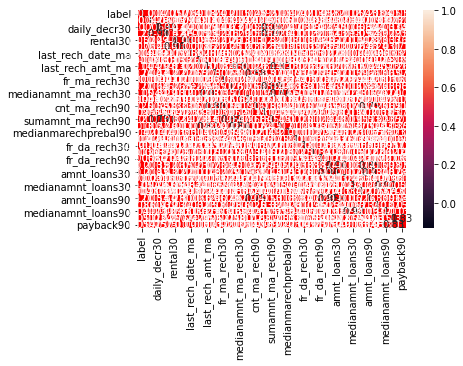

In [45]:
sns.heatmap(cor,annot=True,linewidths=6,linecolor='r')

The heatmap is not very clear hence lets use the bargraph.

Text(0.5, 1.0, 'Correlation with target Variable that is label column')

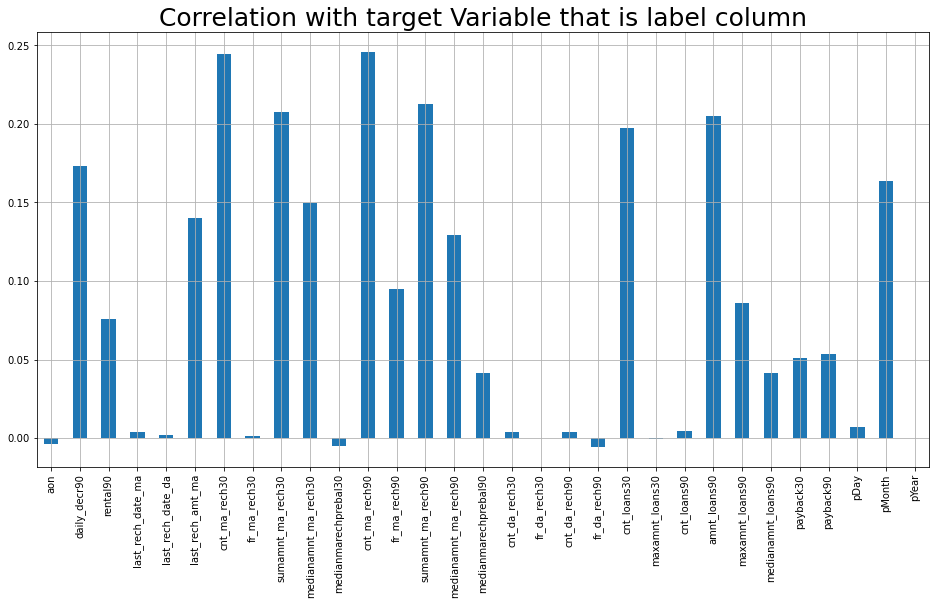

In [46]:
plt.figure(figsize=(16,8))
df.drop('label', axis=1).corrwith(df['label']).plot(kind='bar',grid=True)
plt.xticks(rotation='vertical')
plt.title("Correlation with target Variable that is label column",fontsize=25)

We can see the correaltion of our target variable 'label' with other columns.

# Checking the number of fraud cases

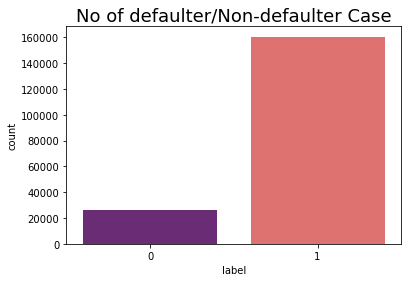

1    160383
0     25860
Name: label, dtype: int64


In [47]:
sns.countplot(x='label', data=df, palette='magma')
plt.title('No of defaulter/Non-defaulter Case',fontsize=18)
plt.show()

print(df['label'].value_counts())

Label 1 indicates Non-Defauter and Label 0 indicates Defaulter

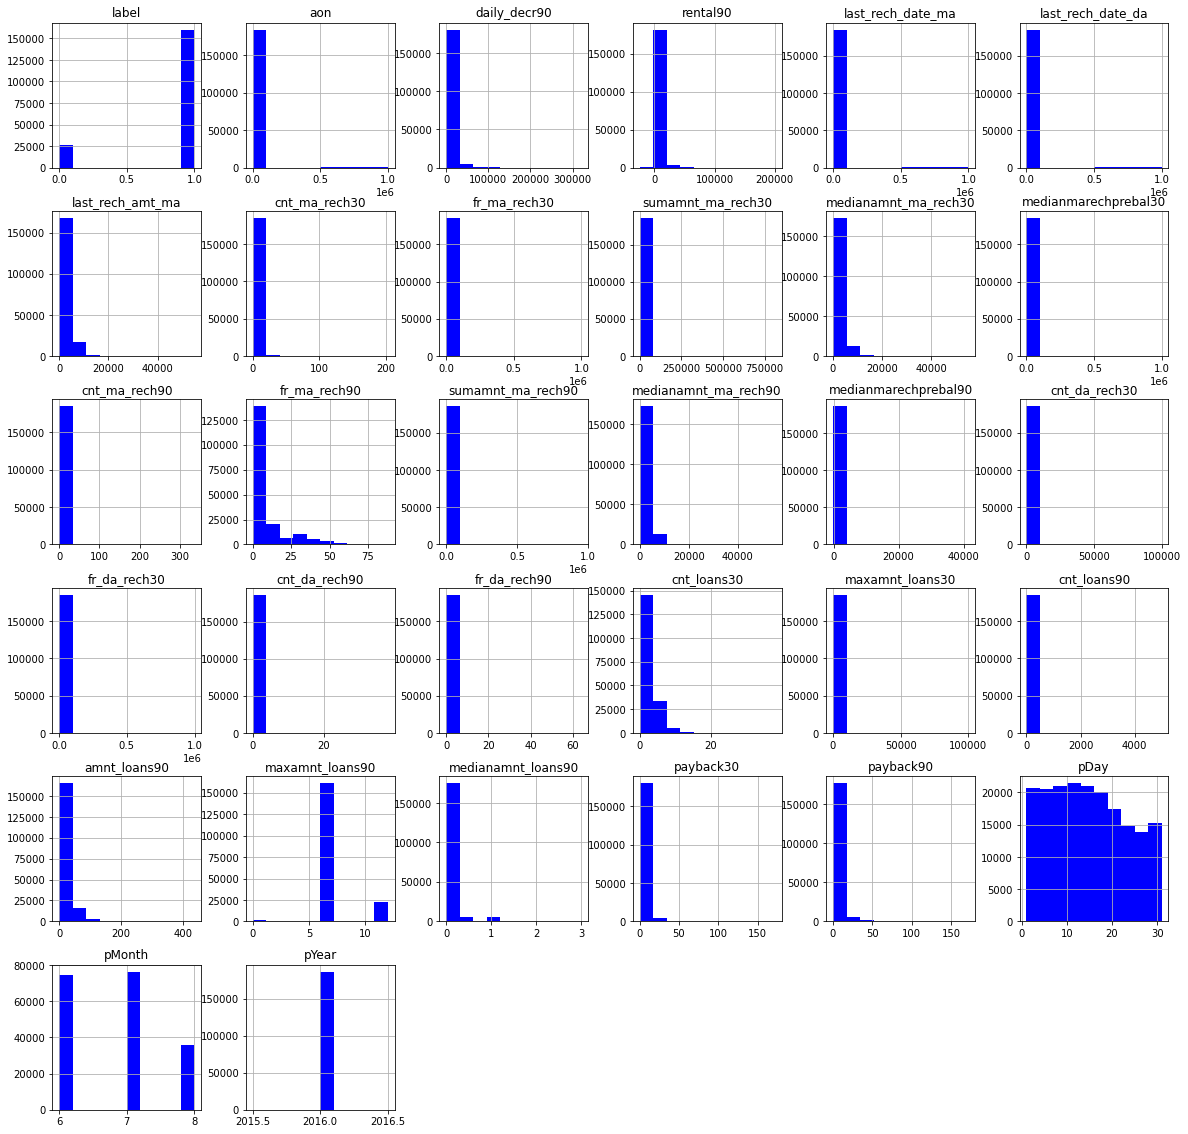

In [48]:
#Plotting the Histogram
df.hist(figsize=(20,20),color='b')
plt.show()

Histogram is mainly plotted to determine the spread of continuous sample data.

# Customer label according to Date

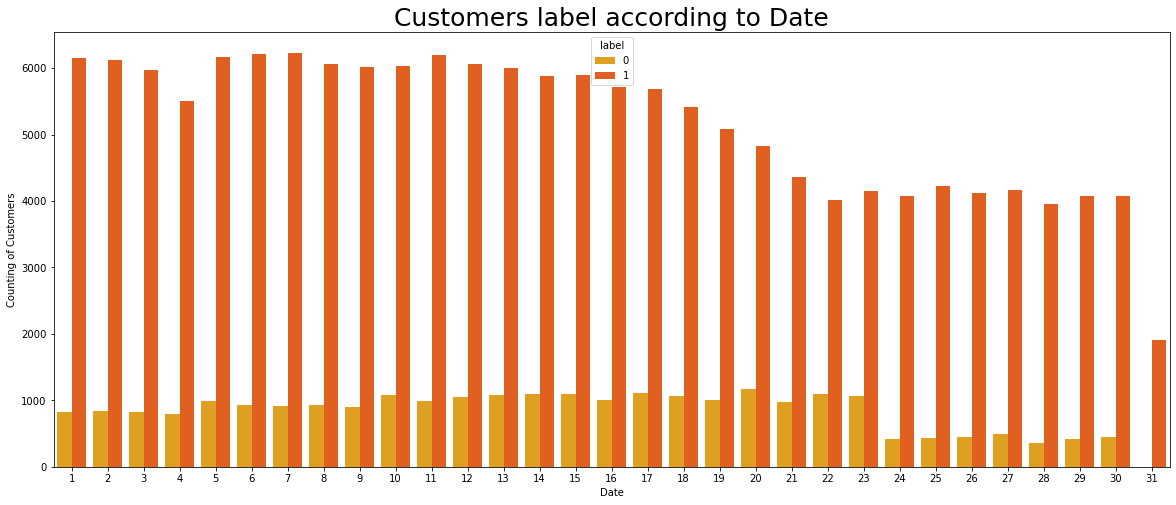

In [49]:
plt.figure(figsize=(20,8))
sns.countplot(x="pDay", hue='label', data=df, palette='autumn_r')
plt.title("Customers label according to Date", fontsize=25)
plt.xlabel('Date')
plt.ylabel('Counting of Customers')
plt.show()


This figure shows the customer who did not pay their loans from date 10 to 23

# Customer label according to Month


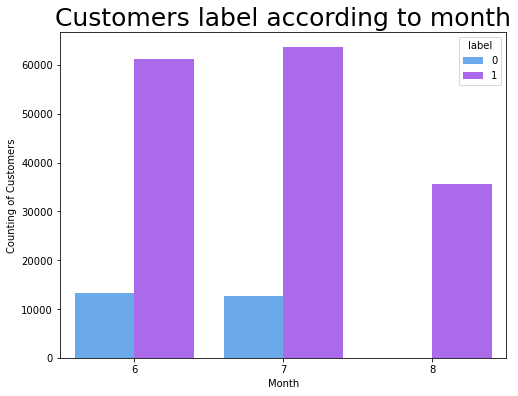

In [50]:
plt.figure(figsize=(8,6))
sns.countplot(x="pMonth", hue='label', data=df, palette='cool')
plt.title("Customers label according to month", fontsize=25)
plt.xlabel('Month')
plt.ylabel('Counting of Customers')
plt.show()


This figure shows the customer who did not pay their loans in the month of June and July.

# Skewness

In [51]:
df.skew()

label                   -2.088847
aon                     10.365026
daily_decr90             4.301490
rental90                 4.530925
last_rech_date_ma       14.852116
last_rech_date_da       14.781824
last_rech_amt_ma         3.830612
cnt_ma_rech30            3.471313
fr_ma_rech30            14.822224
sumamnt_ma_rech30        7.134012
medianamnt_ma_rech30     3.519213
medianmarechprebal30    14.677544
cnt_ma_rech90            3.558616
fr_ma_rech90             2.250443
sumamnt_ma_rech90        5.231693
medianamnt_ma_rech90     3.753115
medianmarechprebal90    43.576364
cnt_da_rech30           17.749485
fr_da_rech30            14.728609
cnt_da_rech90           28.396293
fr_da_rech90            28.959851
cnt_loans30              2.737584
maxamnt_loans30         17.718074
cnt_loans90             16.717192
amnt_loans90             3.165962
maxamnt_loans90          1.650198
medianamnt_loans90       4.774958
payback30                8.193009
payback90                6.763241
pDay          

# Grapfical representation of Skewness

<AxesSubplot:ylabel='Frequency'>

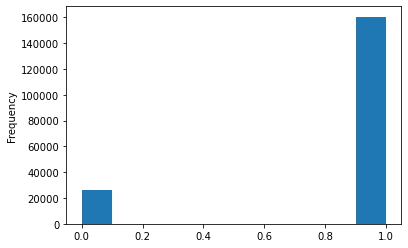

In [52]:
df['label'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

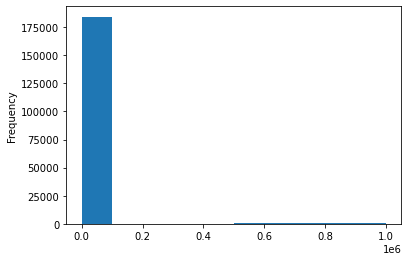

In [53]:
df['aon'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

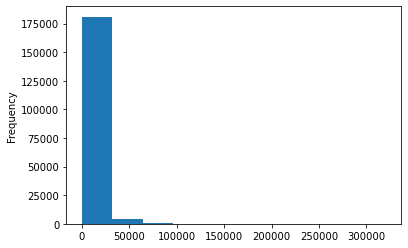

In [54]:
df['daily_decr90'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

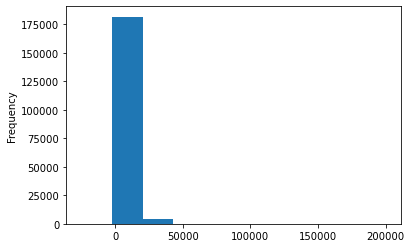

In [55]:
df['rental90'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

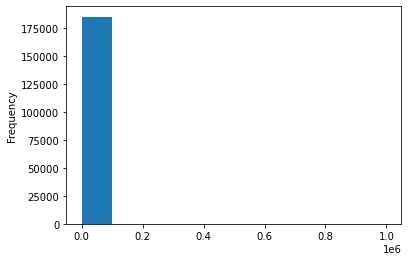

In [56]:
df['last_rech_date_ma'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

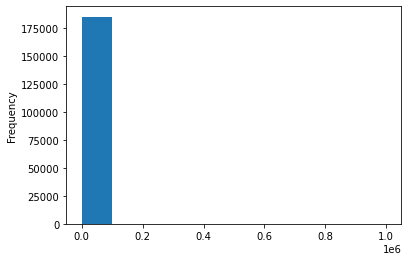

In [57]:
df['last_rech_date_da'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

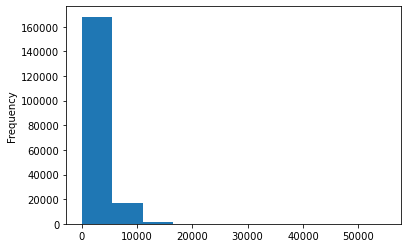

In [58]:
df['last_rech_amt_ma'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

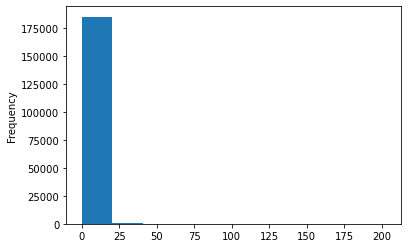

In [59]:
df['cnt_ma_rech30'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

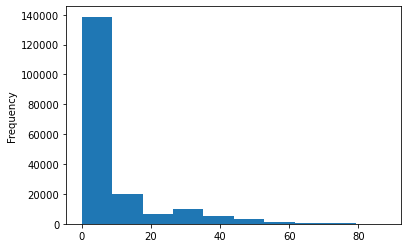

In [60]:
df['fr_ma_rech90'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

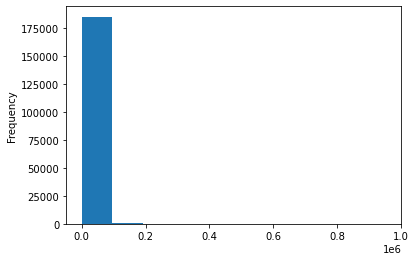

In [61]:
df['sumamnt_ma_rech90'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

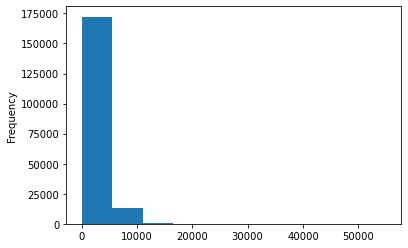

In [62]:
df['medianamnt_ma_rech90'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

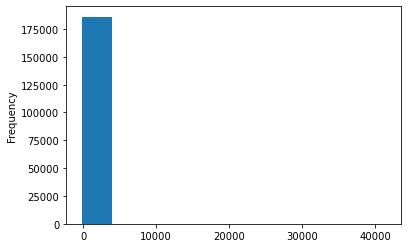

In [63]:
df['medianmarechprebal90'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

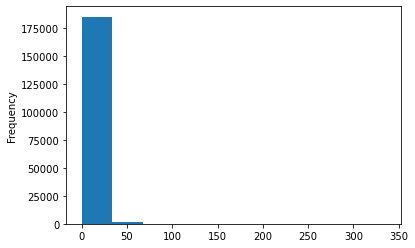

In [64]:
df['cnt_ma_rech90'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

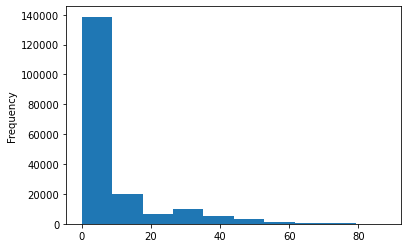

In [65]:
df['fr_ma_rech90'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

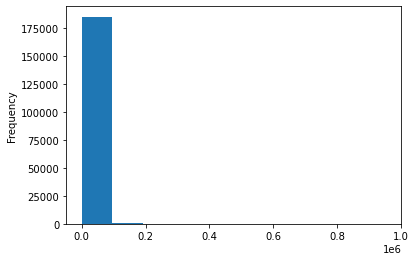

In [66]:
df['sumamnt_ma_rech90'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

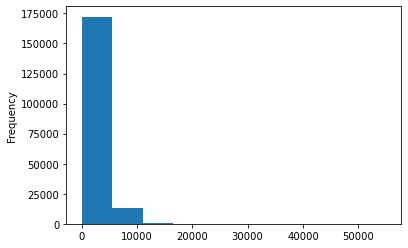

In [67]:
df['medianamnt_ma_rech90'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

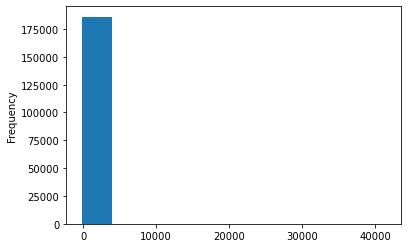

In [68]:
df['medianmarechprebal90'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

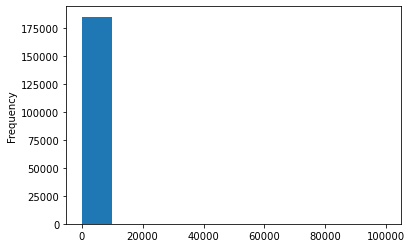

In [69]:
df['cnt_da_rech30'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

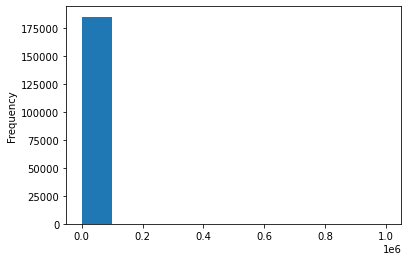

In [70]:
df['fr_da_rech30'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

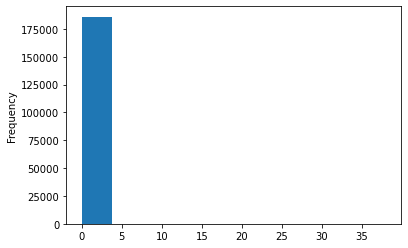

In [71]:
df['cnt_da_rech90'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

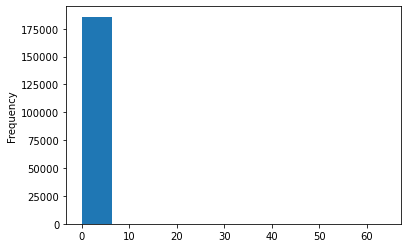

In [72]:
df['fr_da_rech90'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

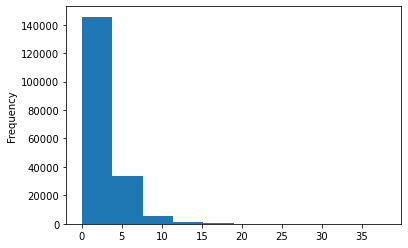

In [73]:
df['cnt_loans30'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

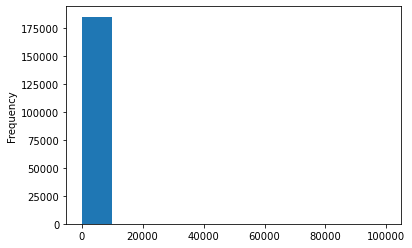

In [74]:
df['maxamnt_loans30'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

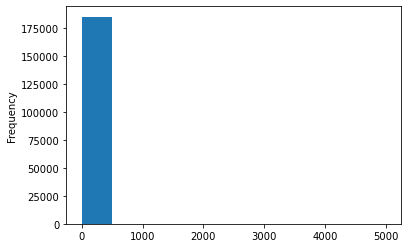

In [75]:
df['cnt_loans90'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

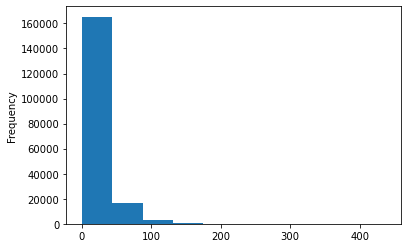

In [76]:
df['amnt_loans90'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

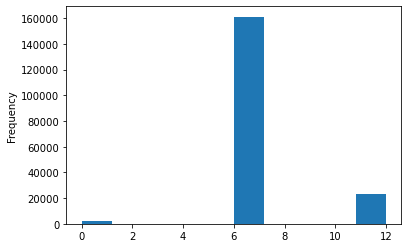

In [77]:
df['maxamnt_loans90'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

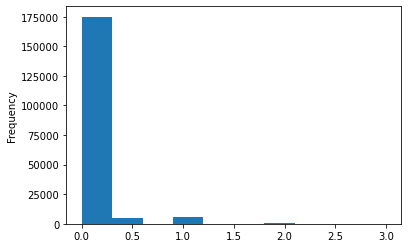

In [78]:
df['medianamnt_loans90'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

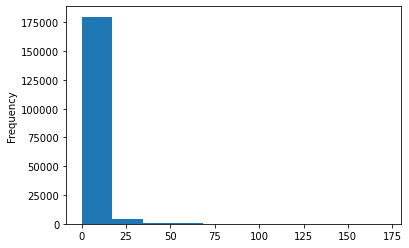

In [79]:
df['payback30'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

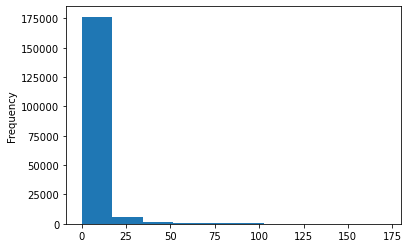

In [80]:
df['payback90'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

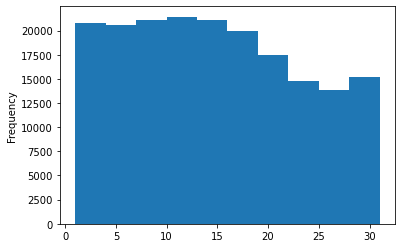

In [81]:
df['pDay'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

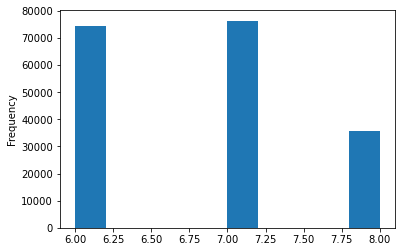

In [82]:
df['pMonth'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

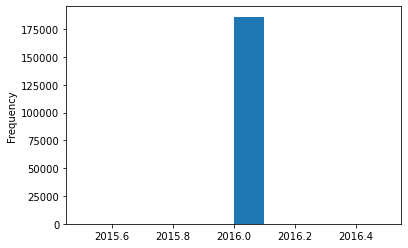

In [83]:
df['pYear'].plot.hist()

# Outliers

label                      AxesSubplot(0.125,0.536818;0.032563x0.343182)
aon                     AxesSubplot(0.164076,0.536818;0.032563x0.343182)
daily_decr90            AxesSubplot(0.203151,0.536818;0.032563x0.343182)
rental90                AxesSubplot(0.242227,0.536818;0.032563x0.343182)
last_rech_date_ma       AxesSubplot(0.281303,0.536818;0.032563x0.343182)
last_rech_date_da       AxesSubplot(0.320378,0.536818;0.032563x0.343182)
last_rech_amt_ma        AxesSubplot(0.359454,0.536818;0.032563x0.343182)
cnt_ma_rech30           AxesSubplot(0.398529,0.536818;0.032563x0.343182)
fr_ma_rech30            AxesSubplot(0.437605,0.536818;0.032563x0.343182)
sumamnt_ma_rech30       AxesSubplot(0.476681,0.536818;0.032563x0.343182)
medianamnt_ma_rech30    AxesSubplot(0.515756,0.536818;0.032563x0.343182)
medianmarechprebal30    AxesSubplot(0.554832,0.536818;0.032563x0.343182)
cnt_ma_rech90           AxesSubplot(0.593908,0.536818;0.032563x0.343182)
fr_ma_rech90            AxesSubplot(0.632983,0.5368

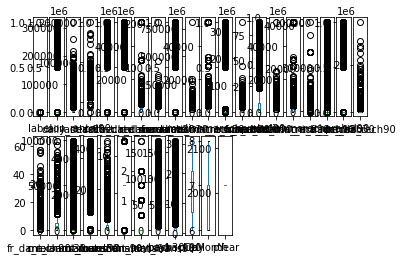

In [84]:
df.plot(kind='box',subplots=True,layout=(2,20))

<AxesSubplot:>

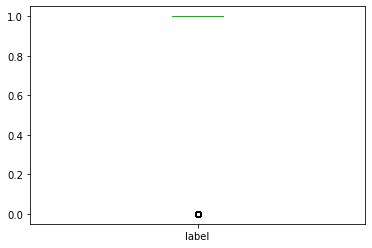

In [85]:
df['label'].plot.box()

Outliers are present in this column.

<AxesSubplot:>

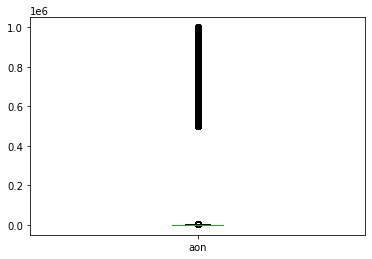

In [112]:
df['aon'].plot.box()

Outliers are present in this column.

<AxesSubplot:>

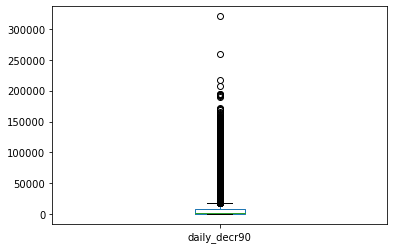

In [113]:
df['daily_decr90'].plot.box()

Outliers are present in this column.

<AxesSubplot:>

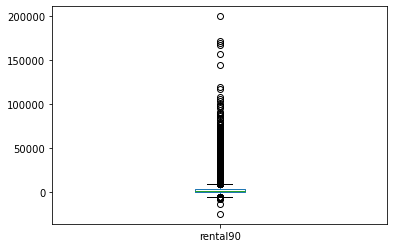

In [114]:
df['rental90'].plot.box()

Outliers are present in this column

<AxesSubplot:>

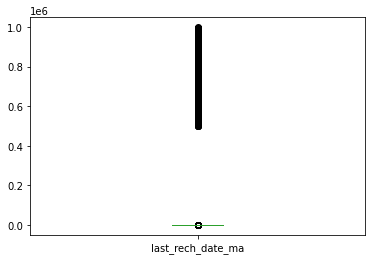

In [115]:
df['last_rech_date_ma'].plot.box()

Outliers are present in this column

<AxesSubplot:>

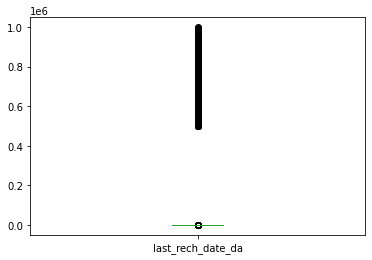

In [116]:
df['last_rech_date_da'].plot.box()

Outliers are present in this column

<AxesSubplot:>

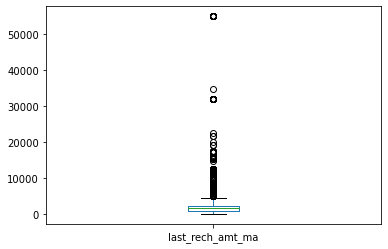

In [117]:
df['last_rech_amt_ma'].plot.box()

Outliers are present in this column

<AxesSubplot:>

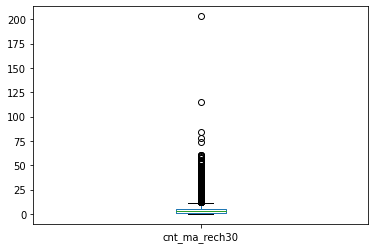

In [118]:
df['cnt_ma_rech30'].plot.box()

Outliers are present in this column

<AxesSubplot:>

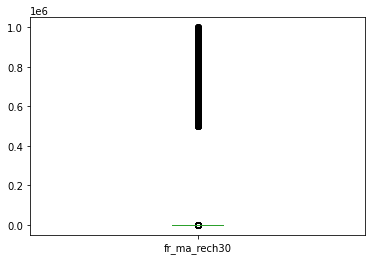

In [119]:
df['fr_ma_rech30'].plot.box()

Outliers are present in this column

<AxesSubplot:>

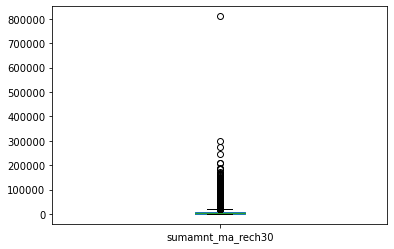

In [120]:
df['sumamnt_ma_rech30'].plot.box()

Outliers are present in this column

<AxesSubplot:>

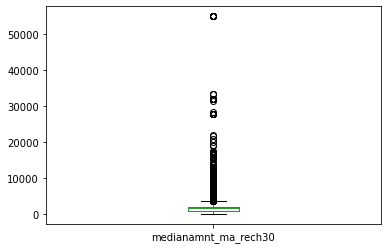

In [121]:
df['medianamnt_ma_rech30'].plot.box()

Outliers are present in this column

<AxesSubplot:>

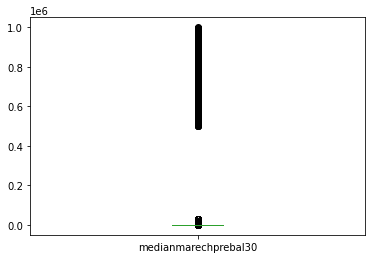

In [122]:
df['medianmarechprebal30'].plot.box()

Outliers are present in this column

<AxesSubplot:>

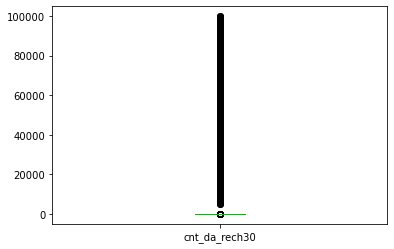

In [123]:
df['cnt_da_rech30'].plot.box()

Outliers are present in this column

<AxesSubplot:>

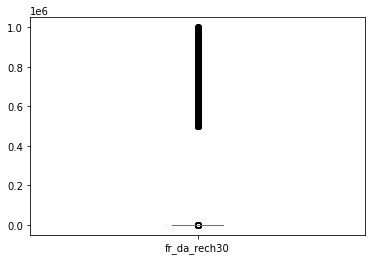

In [124]:
df['fr_da_rech30'].plot.box()

Outliers are present in this column

<AxesSubplot:>

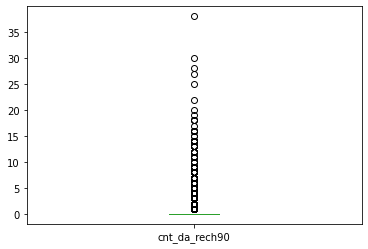

In [125]:
df['cnt_da_rech90'].plot.box()

Outliers are present in this column

<AxesSubplot:>

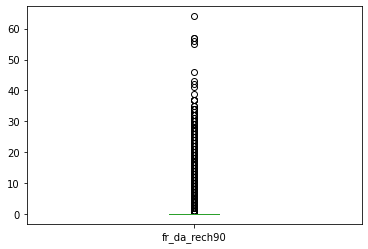

In [126]:
df['fr_da_rech90'].plot.box()

Outliers are present in this column

<AxesSubplot:>

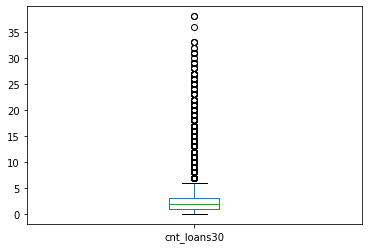

In [127]:
df['cnt_loans30'].plot.box()

Outliers are present in this column

<AxesSubplot:>

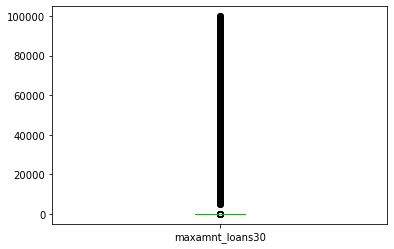

In [128]:
df['maxamnt_loans30'].plot.box()

Outliers are present in this column

<AxesSubplot:>

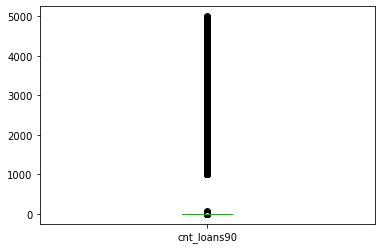

In [129]:
df['cnt_loans90'].plot.box()

Outliers are present in this column

<AxesSubplot:>

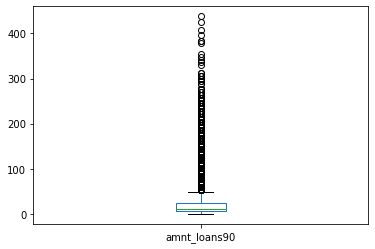

In [130]:
df['amnt_loans90'].plot.box()

Outliers are present in this column

<AxesSubplot:>

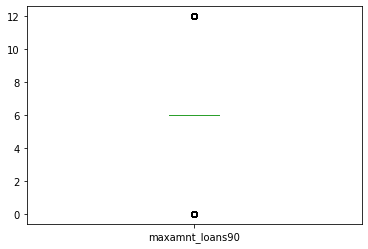

In [131]:
df['maxamnt_loans90'].plot.box()

Only few outliers arepesent in this column.

<AxesSubplot:>

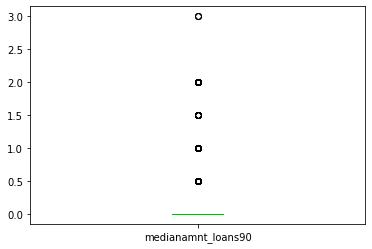

In [132]:
df['medianamnt_loans90'].plot.box()

Only few outliers arepesent in this column.

<AxesSubplot:>

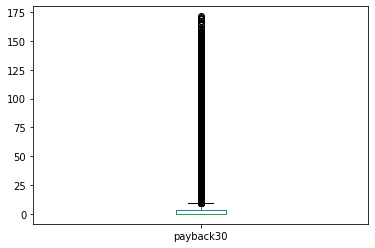

In [134]:
df['payback30'].plot.box()

Outliers are present in this column

<AxesSubplot:>

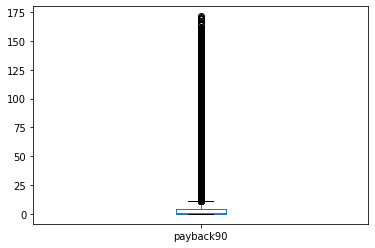

In [135]:
df['payback90'].plot.box()

Outliers are present in this column

<AxesSubplot:>

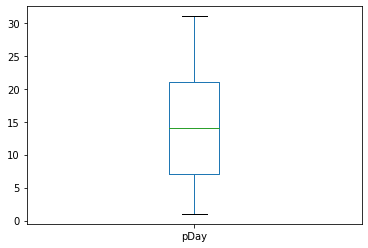

In [136]:
df['pDay'].plot.box()

No outliers are present in this column.

<AxesSubplot:>

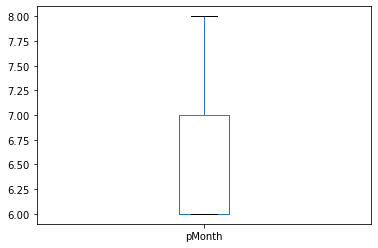

In [137]:
df['pMonth'].plot.box()

No outliers are present in this column.

<AxesSubplot:>

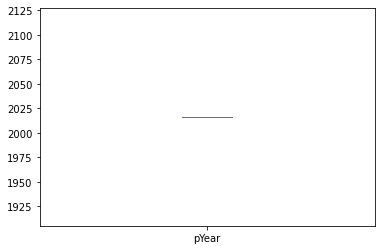

In [86]:
df['pYear'].plot.box()

No outliers are present in this column.

There are many ouliers which are present and need to be removed.

In [87]:
#Creating a copy of our dataset
df2=df1.copy()
#Dropping the object columns
df1.drop(columns=['msisdn','pdate'],axis=1,inplace=True)

In [88]:
df1.columns

Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90'],
      dtype='object')

# Removal of outliers

In [89]:
from scipy.stats import zscore
z=np.abs(zscore(df1))
z

array([[2.64789583, 0.10357685, 0.25229941, ..., 0.22959366, 2.9046997 ,
        2.39409346],
       [0.37765836, 0.09776412, 0.73103667, ..., 0.22959366, 0.38562959,
        0.41923266],
       [0.37765836, 0.10010243, 0.43201111, ..., 0.22959366, 0.38562959,
        0.41923266],
       ...,
       [0.37765836, 0.09378769, 0.70079045, ..., 0.22959366, 0.06820893,
        0.04735622],
       [0.37765836, 0.08428915, 0.77075515, ..., 0.22959366, 0.38562959,
        0.59938541],
       [0.37765836, 0.08628398, 0.09674426, ..., 0.22959366, 0.38562959,
        0.41923266]])

In [90]:
threshold=3
print(np.where(z>3))

(array([    21,     22,     22, ..., 209586, 209587, 209587]), array([15, 15, 32, ..., 28, 26, 30]))


In [91]:
df1_new=df1[(z<3).all(axis=1)]

In [92]:
df1.shape

(209593, 33)

There are 209593 rows and 33 columns.

In [93]:
df1_new.shape

(161465, 33)

There are 16165 rows and 33 columns.

# Using LabelEncoder for the conversion of data

In [94]:
from sklearn.preprocessing import LabelEncoder

In [95]:
le=LabelEncoder()

In [96]:
for column in df.columns:
    if df[column].dtype==np.number:
        continue
    df[column]=le.fit_transform(df[column])

<ipython-input-96-fdfaa4ee93d5>:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype==np.number:
<ipython-input-96-fdfaa4ee93d5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column]=le.fit_transform(df[column])


In [97]:
df.head()

,label,msisdn,aon,daily_decr90,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pDay,pMonth,pYear
0,0,40191,272.0,3065.150000,260.13,2.0,0.0,14,2,21.0,...,6.0,2.0,2,1,0.0,29.000000,29.000000,19,1,0
1,1,142291,712.0,12124.750000,3691.26,20.0,0.0,38,1,0.0,...,12.0,1.0,2,2,0.0,0.000000,0.000000,9,2,0
2,1,33594,535.0,1398.000000,900.13,3.0,0.0,14,1,0.0,...,6.0,1.0,1,1,0.0,0.000000,0.000000,18,2,0
3,1,104157,241.0,21.228000,159.42,41.0,0.0,10,0,0.0,...,6.0,2.0,2,1,0.0,0.000000,0.000000,5,0,0
4,1,6910,947.0,150.619333,1098.90,4.0,0.0,23,7,2.0,...,6.0,7.0,7,1,0.0,2.333333,2.333333,21,0,0


# Splitting the data set

In [98]:
x=df.drop(['label'],axis=1)
y=df['label']

# DescisionTreeClassifier

In [99]:
from sklearn.tree import DecisionTreeClassifier

In [100]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(x, y)

DecisionTreeClassifier(max_depth=3)

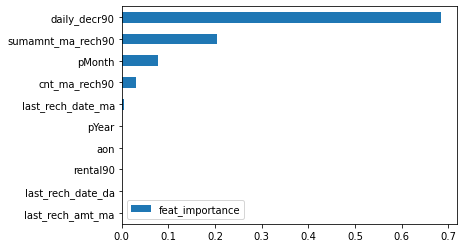

In [101]:
dt_features = pd.DataFrame(dt.feature_importances_, index=x.columns, columns=['feat_importance'])
dt_features.sort_values('feat_importance').tail(10).plot.barh()
plt.show()

'daily_decr90'is the daily amount of money spent from main account,averaged over last 90 days,thisfeature helps us to discriminate the data.This feature basicallybrings insights for company. 

# Training of Model

Scaling of input variables

In [102]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

Splitting of data into training and test data

In [103]:
from sklearn.model_selection import train_test_split,cross_val_score

In [104]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42,stratify=y)

In [105]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [106]:
KNN=KNeighborsClassifier(n_neighbors=10)
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=20)
GNB=GaussianNB()
RF=RandomForestClassifier()

In [107]:
models = []
models.append(('KNeighborsClassifier', KNN))
models.append(('LogisticRegression', LR))
models.append(('DecisionTreeClassifier',DT))
models.append(('GaussianNB', GNB))
models.append(('RandomForestClassifier', RF))

In [108]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

**************************** KNeighborsClassifier ********************************


KNeighborsClassifier(n_neighbors=10)


Accuracy score =  0.8699025477194019


Cross_val_Score =  0.8713937870453654


roc_auc_score =  0.6867161965572931


classification_report
               precision    recall  f1-score   support

           0       0.54      0.43      0.48      5172
           1       0.91      0.94      0.93     32077

    accuracy                           0.87     37249
   macro avg       0.73      0.69      0.70     37249
weighted avg       0.86      0.87      0.86     37249



[[ 2240  2932]
 [ 1914 30163]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



**************************** LogisticRegression ********************************


LogisticRegression()


Accuracy score =  0.8642379661198958


Cross_val_Score =  0.8642364984778247


roc_auc_score =  0.5250645042510697


classification_report
               precision    recall  f1-score   support

           0       0.63    

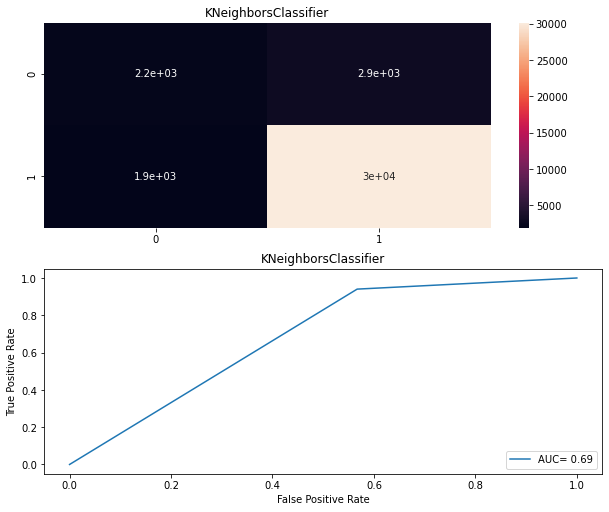

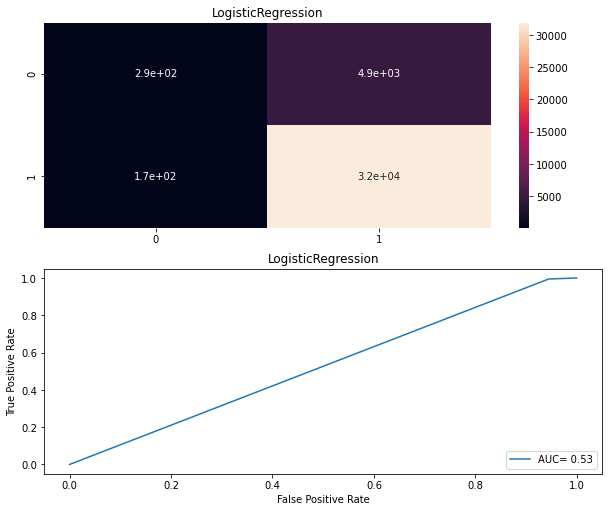

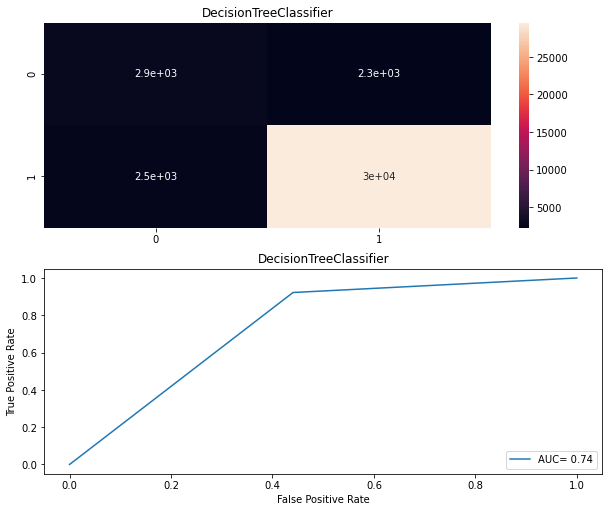

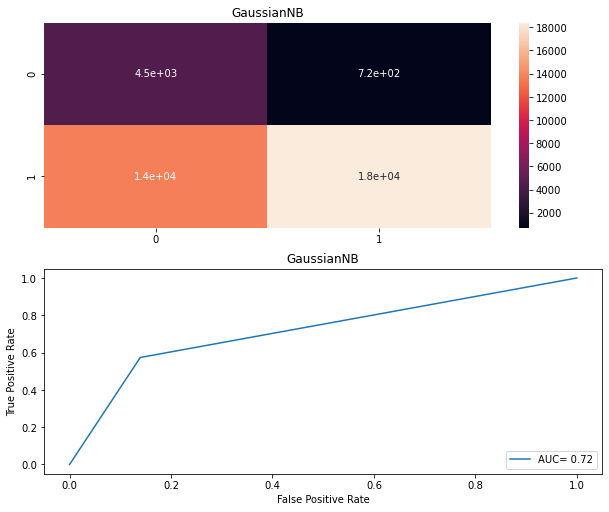

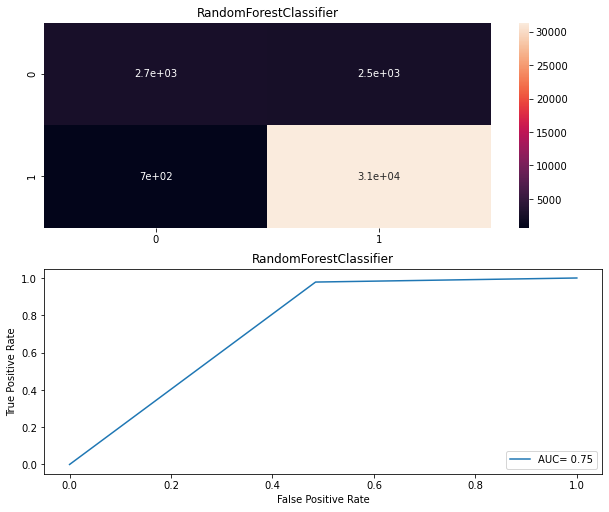

In [109]:
Model=[]
score=[]
cvs=[]
rocscore=[]
for name,model in models:
    print('****************************',name,'********************************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train.values.ravel())
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy score = ', AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('Cross_val_Score = ', sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
    roc_auc= auc(false_positive_rate, true_positive_rate)
    print('roc_auc_score = ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate, true_positive_rate, label = 'AUC= %0.2f'%roc_auc)
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

In [110]:
result=pd.DataFrame({'Model': Model, 'Accuracy_score': score, 'Cross_val_score':cvs, 'Roc_auc_curve':rocscore})
result

,Model,Accuracy_score,Cross_val_score,Roc_auc_curve
0,KNeighborsClassifier,86.990255,87.139379,68.671620
1,LogisticRegression,86.423797,86.423650,52.506450
2,DecisionTreeClassifier,87.175495,87.465835,74.082257
3,GaussianNB,61.362721,60.837705,71.720115
4,RandomForestClassifier,91.390373,91.342493,74.664495
